In [1]:
!git clone https://github.com/thtrieu/darkflow.git

Cloning into 'darkflow'...
remote: Enumerating objects: 2706, done.
remote: Total 2706 (delta 0), reused 0 (delta 0), pack-reused 2706
Receiving objects: 100% (2706/2706), 32.98 MiB | 26.91 MiB/s, done.
Resolving deltas: 100% (1760/1760), done.


In [2]:
!pip install ./darkflow/


Processing ./darkflow
  Created wheel for darkflow: filename=darkflow-1.0.0-cp36-cp36m-linux_x86_64.whl size=831149 sha256=2050fd6ad473f822a81fa8acb2dbda0a373d794bb9e95f4ca2edcfa7fc646fa8
  Stored in directory: /tmp/pip-ephem-wheel-cache-6jeh1se4/wheels/2f/3a/c5/e84e79d73d5a73aa1b5129a66a40947d9d77a32ebed501e431
Successfully built darkflow


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
!mkdir -p /content/drive/My\ Drive/projects
!mkdir -p /content/drive/My\ Drive/projects/yolo
!mkdir -p /content/drive/My\ Drive/projects/yolo/bin
!mkdir -p /content/drive/My\ Drive/projects/yolo/cfg
!wget https://raw.githubusercontent.com/thtrieu/darkflow/master/cfg/coco.names -O /content/drive/My\ Drive/projects/yolo/cfg/coco.names
!wget https://raw.githubusercontent.com/thtrieu/darkflow/master/cfg/yolo.cfg -O /content/drive/My\ Drive/projects/yolo/cfg/yolo.cfg
!wget https://pjreddie.com/media/files/yolov2.weights -O /content/drive/My\ Drive/projects/yolo/bin/yolo.weights

--2019-08-24 17:31:47--  https://raw.githubusercontent.com/thtrieu/darkflow/master/cfg/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘/content/drive/My Drive/projects/yolo/cfg/coco.names’

/content/drive/My D 100%[===================>]     625  --.-KB/s    in 0s      

2019-08-24 17:31:47 (146 MB/s) - ‘/content/drive/My Drive/projects/yolo/cfg/coco.names’ saved [625/625]

--2019-08-24 17:31:49--  https://raw.githubusercontent.com/thtrieu/darkflow/master/cfg/yolo.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 2

In [0]:
from darkflow.net.build import TFNet
import cv2
import numpy as np
import requests
import os
from scipy import misc

from urllib.request import urlopen

In [10]:

os.chdir('/content/drive/My Drive/projects/yolo') # Google CoLab
#os.chdir('/Users/jheaton/projects/darkflow') # Local

# For GPU (Google CoLab)
options = {"model": "./cfg/yolo.cfg", "load": "./bin/yolo.weights", "threshold": 0.1, "gpu": 1.0}

# For CPU 
#options = {"model": "./cfg/yolo.cfg", "load": "./bin/yolo.weights", "threshold": 0.1}

tfnet = TFNet(options)


# Read image to classify
url="https://instagram.fhyd2-1.fna.fbcdn.net/vp/eefd1a17d8be8b136890e6ef01b006bf/5DF9CBFF/t51.2885-15/e35/67366016_376970446537592_5588075687974222062_n.jpg?_nc_ht=instagram.fhyd2-1.fna.fbcdn.net"
resp = urlopen(url)
img = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)

result = tfnet.return_predict(img)

Parsing ./cfg/yolo.cfg
Loading ./bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.05232644081115723s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +

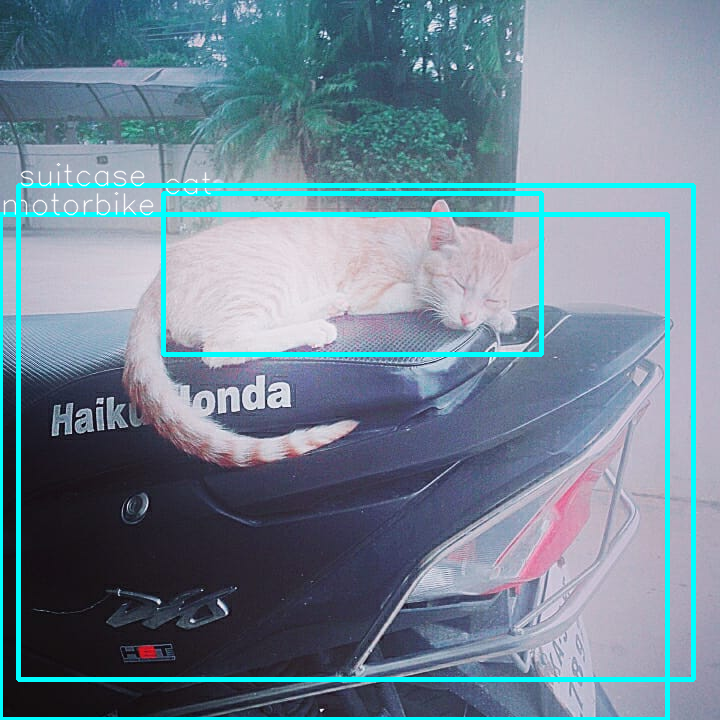

In [16]:
for row in result:
  cv2.rectangle(img,(row["topleft"]["x"],row["topleft"]["y"]),(row["bottomright"]["x"],row["bottomright"]["y"]),(255,254,1),3)
  cv2.putText(img,row["label"],(row["topleft"]["x"],row["topleft"]["y"]),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255,255 ), lineType=cv2.LINE_AA)
cv2_imshow(img)

In [46]:
for row in result:
 print(row["label"])


person
truck
car
car
boat


In [0]:
from skimage import io

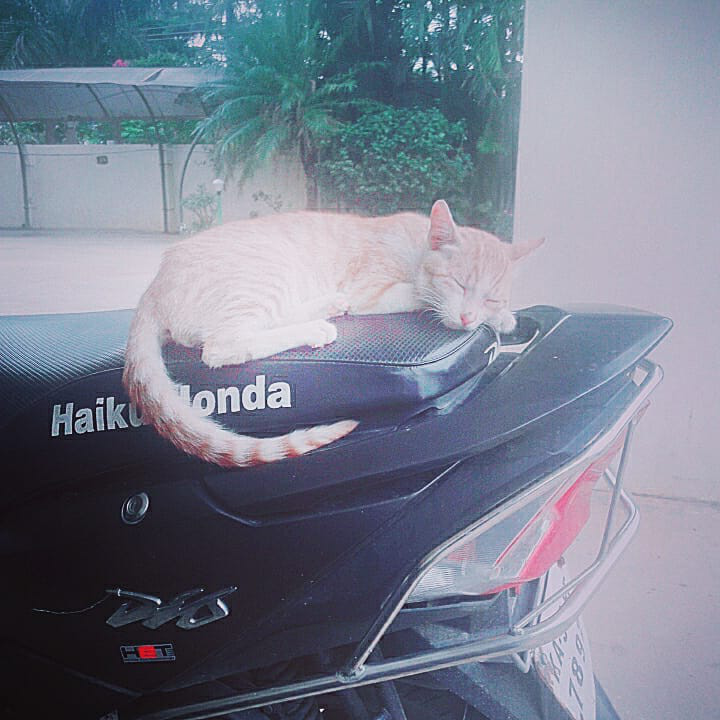

In [14]:
from google.colab.patches import cv2_imshow
image=io.imread(url)
cv2_imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [0]:
cap=cv2.VideoCapture(0)

In [39]:
while(True):
    ret, frame = cap.read()
   
	
    # Display the resulting frame
    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

AttributeError: ignored